In [1]:
import numpy as np
import pandas as pd

In [15]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

def draw_multiple_bboxes_matplotlib(image_path, boxes, color='lime', linewidth=2, show_labels=True):
    """
    Draw multiple bounding boxes using Matplotlib.
    
    Args:
        image_path (str): Path to the image file.
        boxes (list[dict]): List of dicts like 
            {"xmin": int, "ymin": int, "xmax": int, "ymax": int, "label": str (optional)}.
        color (str): Box color name or hex.
        linewidth (int): Line thickness.
        show_labels (bool): Whether to display labels.
    """
    # Load image
    image = Image.open(image_path)
    fig, ax = plt.subplots(1, figsize=(8, 8))
    ax.imshow(image)

    # Draw all boxes
    for box in boxes:
        xmin, ymin, xmax, ymax = box["xmin"], box["ymin"], box["xmax"], box["ymax"]
        label = box.get("label", "")
        width, height = xmax - xmin, ymax - ymin
        
        # Draw rectangle
        rect = patches.Rectangle(
            (xmin, ymin), width, height,
            linewidth=linewidth, edgecolor=color, facecolor='none'
        )
        ax.add_patch(rect)

        # Add label text
        if show_labels and label:
            ax.text(xmin, ymin - 5, label, color=color, fontsize=10,
                    bbox=dict(facecolor='black', alpha=0.5, pad=1, edgecolor='none'))

    plt.axis('off')
    plt.show()

In [2]:
data = pd.read_csv("/Data2/Arun-UAV/NLP/vision_halu/evidence_head_train_datasets/flicker/final_flicker_30k_bb_annot.csv")

In [3]:
data.head(2)

,caption,question,image_id,candidate_bb_info
0,Three people are on a sidewalk.,How many people are on the sidewalk?,1191423753,"{'Three': [{'xmin': 351, 'ymin': 177, 'xmax': ..."
1,"Beautiful brunette woman, draped in purple, bl...",What colors are the scarves draped around the ...,1360456780,"{'Beautiful': [{'xmin': 106, 'ymin': 38, 'xmax..."


In [53]:
i = 30000

In [54]:
image_path = "/Data2/Arun-UAV/NLP/vision_halu/evidence_head_train_datasets/flicker/flickr30k-images/" + str(int(data["image_id"].iloc[i])) + ".jpg"

In [55]:
bb_info = eval(data["candidate_bb_info"].iloc[i])
print(bb_info.keys())

dict_keys(['group', 'young', 'men', 'something', 'board'])


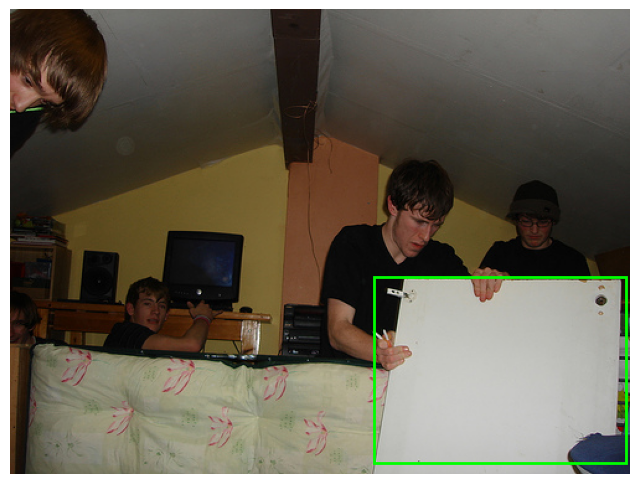

In [58]:
draw_multiple_bboxes_matplotlib(image_path, bb_info["board"])